# **Preparing Data**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [2]:
path_train = "https://raw.githubusercontent.com/Pramox71/Data-Mining/main/Weather%20Training%20Data.csv"
df_train = pd.read_csv(path_train)
df_train.shape

(99516, 23)

In [3]:
path_test = "https://raw.githubusercontent.com/Pramox71/Data-Mining/main/Weather%20Test%20Data.csv"
df_test = pd.read_csv(path_test)
df_test.shape

(42677, 22)

In [4]:
df_train.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0


In [5]:
X = df_train.drop(columns=['RainTomorrow'])
y = df_train['RainTomorrow']
df = pd.concat([X, df_test], axis=0)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


### **Pengecekkan Nilai Null dan Duplicat Pada Dataset DF**

In [7]:
null_count_per_column = df[:].isnull().sum().sort_values(ascending=False)
print("\nJumlah Nilai Null per Kolom:")
print(null_count_per_column)


Jumlah Nilai Null per Kolom:
Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
row ID               0
dtype: int64


In [8]:
df.duplicated().sum()

0

# **Data Cleaning**

In [9]:
df.drop(columns=['row ID','Sunshine', 'Evaporation'], inplace=True)

In [10]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [11]:
imputer = SimpleImputer(strategy="most_frequent")

In [12]:
kolom_objek_null = df.select_dtypes(include="object").columns
df[kolom_objek_null] = imputer.fit_transform(df[kolom_objek_null])

In [13]:
kolom_float_null = df.select_dtypes(include="float64").columns
df[kolom_float_null] = SimpleImputer(strategy="mean").fit_transform(df[kolom_float_null])

Pengecekkan Nilai Null pada dataset setelah di Data Cleaning

In [14]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

# Encoding Value Bertipe Object

In [15]:
objects = df.select_dtypes(include = "object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])

In [16]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0
2,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
3,2,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,0
4,2,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,41,2.4,19.1,0.0,0,33.0,9,0,17.0,17.0,59.0,24.0,1030.0,1026.2,4.437189,4.503167,8.0,18.8,0
42673,41,2.3,21.4,0.0,9,22.0,9,10,11.0,7.0,60.0,28.0,1026.9,1022.8,4.437189,4.503167,8.9,20.3,0
42674,41,2.6,22.5,0.0,8,19.0,8,0,9.0,7.0,59.0,24.0,1025.0,1021.4,4.437189,4.503167,8.8,22.1,0
42675,41,7.4,20.6,0.0,0,35.0,2,0,15.0,17.0,63.0,33.0,1027.2,1023.3,4.437189,4.503167,11.0,20.3,0


Pemisahan Dataset Training dengan Test setelah dilakukan Data Cleaning

In [17]:
train = df.iloc[:99516,:]
new_train = pd.concat([train, y], axis=1)
test = df.iloc[99516:, :]

In [18]:
new_train.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.600000,13,44.0,13,14,20.000000,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,2,7.4,25.1,0.000000,14,44.0,6,15,4.000000,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,2,17.5,32.3,1.000000,13,41.0,1,7,7.000000,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,2,14.6,29.7,0.200000,14,56.0,13,13,19.000000,24.0,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,0,0
4,2,7.7,26.7,0.000000,13,35.0,10,13,6.000000,17.0,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,0,0
5,2,13.1,30.1,1.400000,13,28.0,8,10,15.000000,11.0,58.0,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,1,0
6,2,13.4,30.4,0.000000,3,30.0,10,2,17.000000,6.0,48.0,22.0,1011.8,1008.7,4.437189,4.503167,20.4,28.8,0,1
7,2,15.9,21.7,2.200000,5,31.0,4,1,15.000000,13.0,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0,1,1
8,2,12.6,21.0,3.600000,12,44.0,13,11,24.000000,20.0,65.0,43.0,1001.2,1001.8,4.437189,7.000000,15.8,19.8,1,0
9,2,9.8,27.7,2.349974,14,50.0,3,14,14.001988,22.0,50.0,28.0,1013.4,1010.3,0.000000,4.503167,17.3,26.2,0,0


# Visualisasi Data

<Axes: >

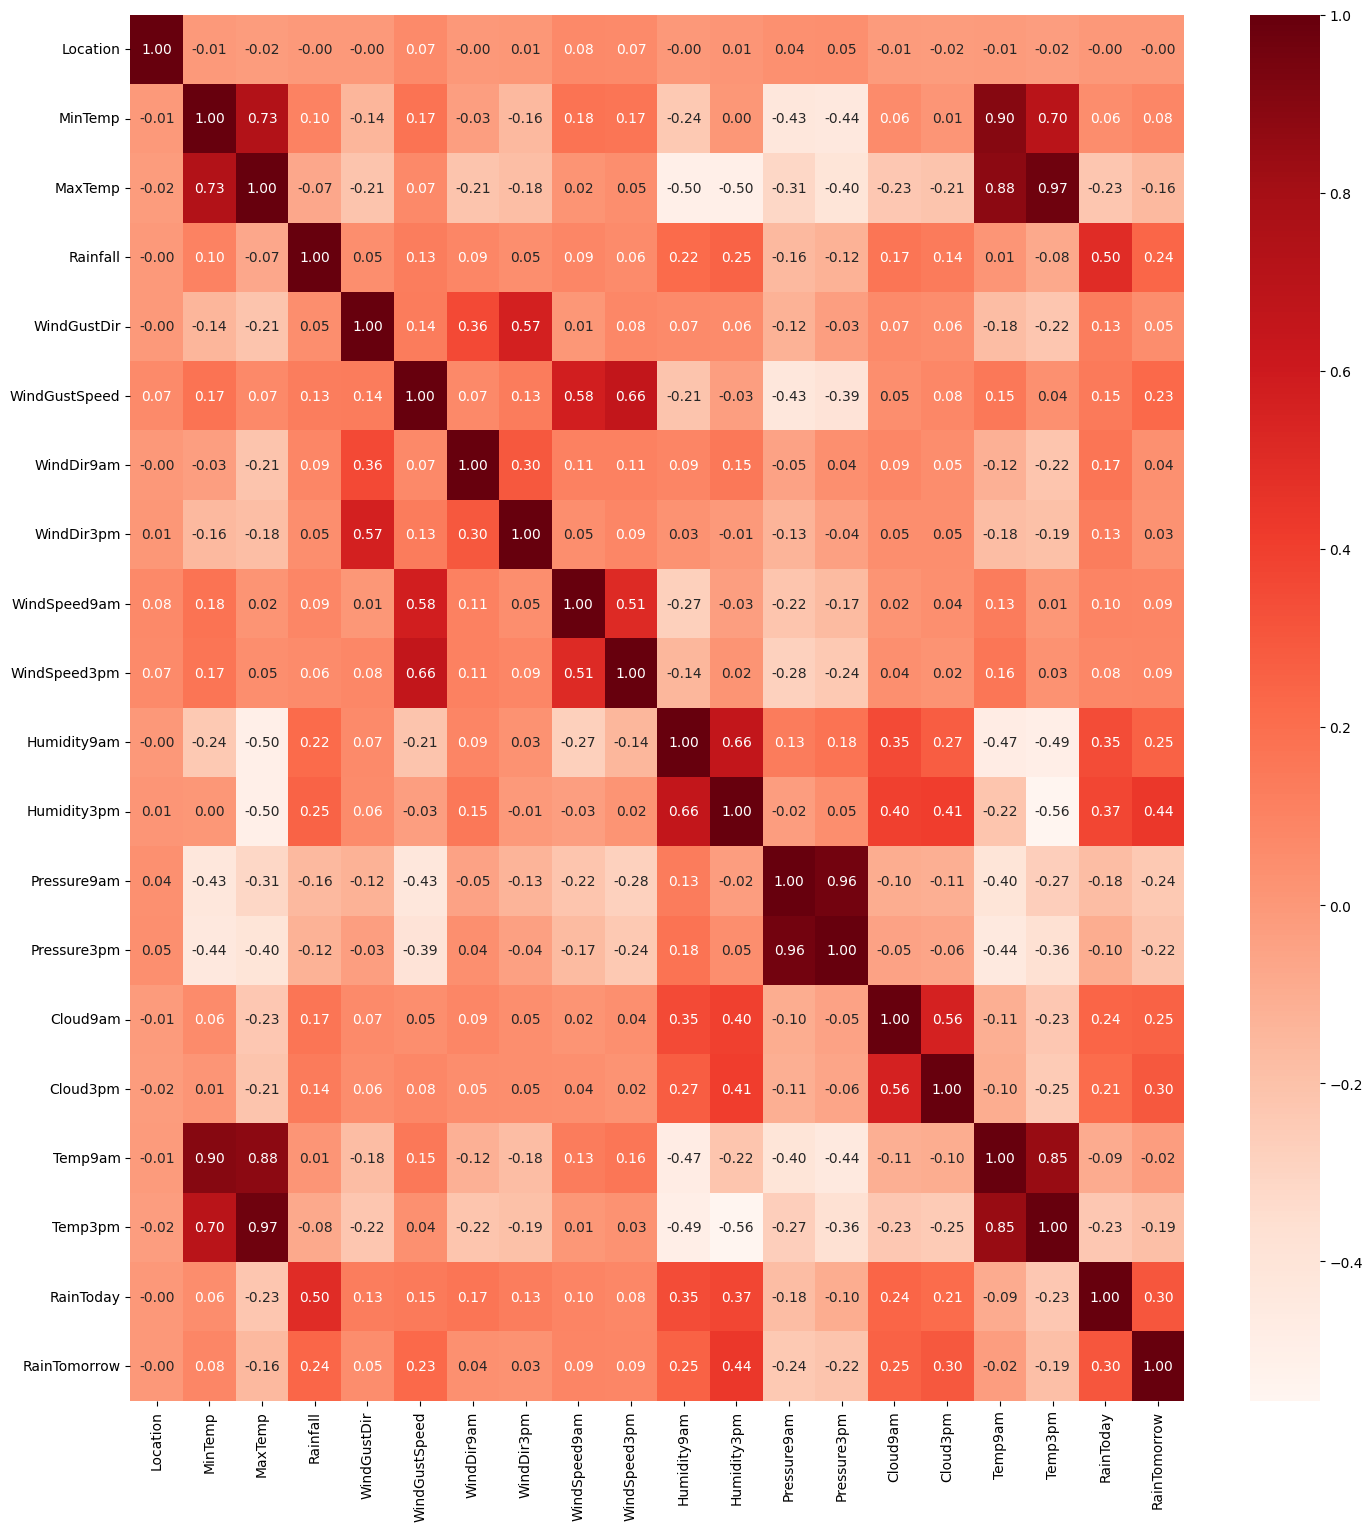

In [19]:
plt.figure(figsize=(17,18))
cor = new_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<Axes: xlabel='Humidity9am', ylabel='MinTemp'>

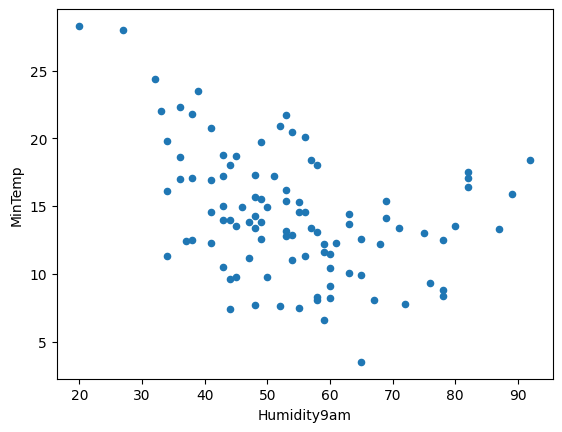

In [20]:
new_train.head(100).plot.scatter("Humidity9am", "MinTemp")

<Axes: xlabel='Humidity9am', ylabel='MaxTemp'>

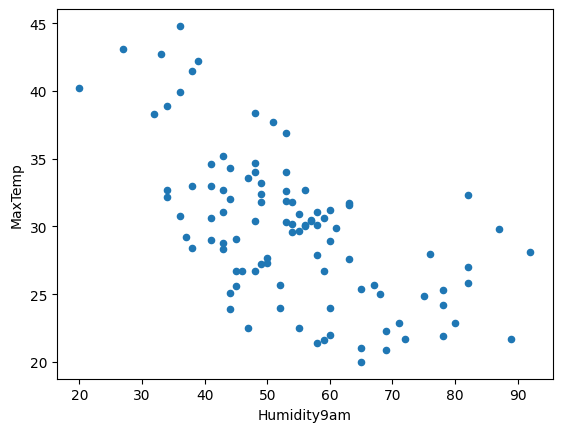

In [21]:
new_train.head(100).plot.scatter("Humidity9am", "MaxTemp")

<Axes: xlabel='Humidity3pm', ylabel='MinTemp'>

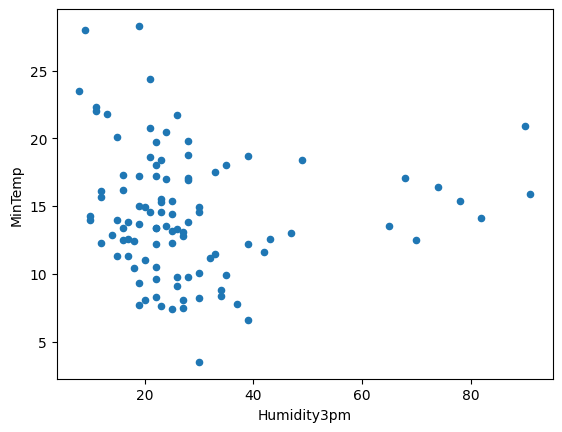

In [22]:
new_train.head(100).plot.scatter("Humidity3pm", "MinTemp")

<Axes: xlabel='Humidity3pm', ylabel='MaxTemp'>

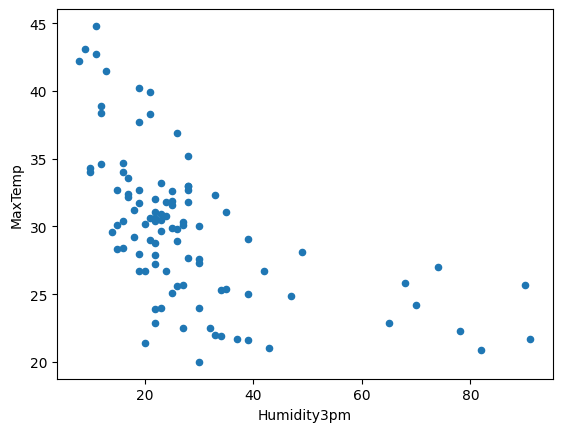

In [23]:
new_train.head(100).plot.scatter("Humidity3pm", "MaxTemp")

In [24]:
Tidak_Hujan = new_train[new_train["RainToday"] == 0]
Hujan = new_train[new_train["RainToday"] == 1]

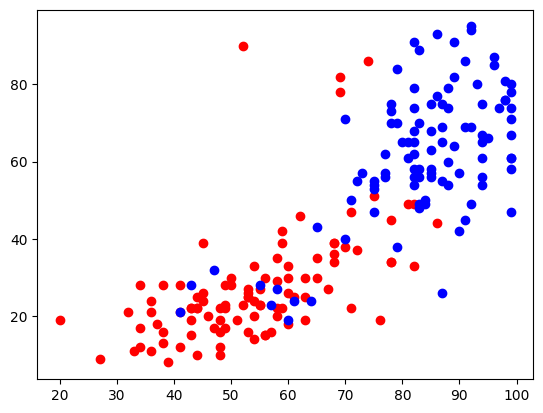

In [25]:
kolom_scatter_x = "Humidity9am"
kolom_scatter_y = "Humidity3pm"

plt.scatter(
    x = Tidak_Hujan[kolom_scatter_x].head(100),
    y = Tidak_Hujan[kolom_scatter_y].head(100),
    c = "red", label= "Tidak Hujan"
)
plt.scatter(
    x = Hujan[kolom_scatter_x].head(100),
    y = Hujan[kolom_scatter_y].head(100),
    c = "blue", label= "Hujan"
)
plt.show()

# Model

In [26]:
df_majority_0 = new_train[(new_train['RainTomorrow']==0)]
df_minority_1 = new_train[(new_train['RainTomorrow']==1)]

df_minority_upsampled = resample(df_minority_1,
                                 replace=True,
                                 n_samples= 77157,
                                 random_state=42)

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

In [27]:
X_model = df_upsampled.drop(columns='RainTomorrow')
y_model = df_upsampled['RainTomorrow']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=36)

Standarisasi MinMax Scaler

In [29]:
mm = MinMaxScaler()
mm.fit(x_train)
X_train_normalized = mm.transform(x_train)
X_test_normalized = mm.transform(x_test)

In [30]:
print("Nilai Normalisasi data Min: ", np.min(X_train_normalized))
print("Nilai Normalisasi data max: ", np.max(X_train_normalized))

Nilai Normalisasi data Min:  0.0
Nilai Normalisasi data max:  1.0


Model Support Vector Machine dengan kernel rbf

In [31]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)

In [32]:
svm_model.fit(X_train_normalized, y_train)

SVC(C=10, gamma=0.1)

In [33]:
y_pred = svm_model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.790266662346499


Model Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators = 5000, random_state = 44, criterion = 'gini')

In [35]:
rf.fit(X_train_normalized, y_train)

RandomForestClassifier(n_estimators=5000, random_state=44)

In [36]:
# test Prediksi
predictions = rf.predict(X_test_normalized)
# Kalkulasi Nilai Eror
errors = abs(predictions - y_test)

In [37]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.61%
